In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/real-estate-dataset/data.csv


In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('../input/real-estate-dataset/data.csv')

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     511 non-null    float64
 1   ZN       511 non-null    float64
 2   INDUS    511 non-null    float64
 3   CHAS     511 non-null    int64  
 4   NOX      511 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      511 non-null    float64
 7   DIS      511 non-null    float64
 8   RAD      511 non-null    int64  
 9   TAX      511 non-null    int64  
 10  PTRATIO  511 non-null    float64
 11  B        511 non-null    float64
 12  LSTAT    511 non-null    float64
 13  MEDV     511 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 56.0 KB


In [6]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         5
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [7]:
df['RM'] = df['RM'].fillna(df['RM'].mean(),axis=0)

In [8]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,3.584139,11.252446,11.151096,0.068493,0.554757,6.287589,68.616243,3.783876,9.485323,407.440313,18.500000,356.600900,12.879550,22.682192
std,8.564433,23.234838,6.828175,0.252838,0.115310,0.700343,28.099130,2.098631,8.688469,167.903532,2.200348,90.882679,7.797416,9.484262
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082325,0.000000,5.190000,0.000000,0.449000,5.887500,45.050000,2.100350,4.000000,279.500000,17.400000,374.710000,7.065000,17.050000
50%,0.261690,0.000000,9.690000,0.000000,0.538000,6.211000,77.300000,3.152300,5.000000,330.000000,19.100000,391.340000,11.450000,21.200000
75%,3.621175,12.500000,18.100000,0.000000,0.624000,6.627000,94.050000,5.118000,24.000000,666.000000,20.200000,396.210000,17.105000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,23.000000,396.900000,76.000000,67.000000


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/li

<AxesSubplot:xlabel='TAX', ylabel='Density'>

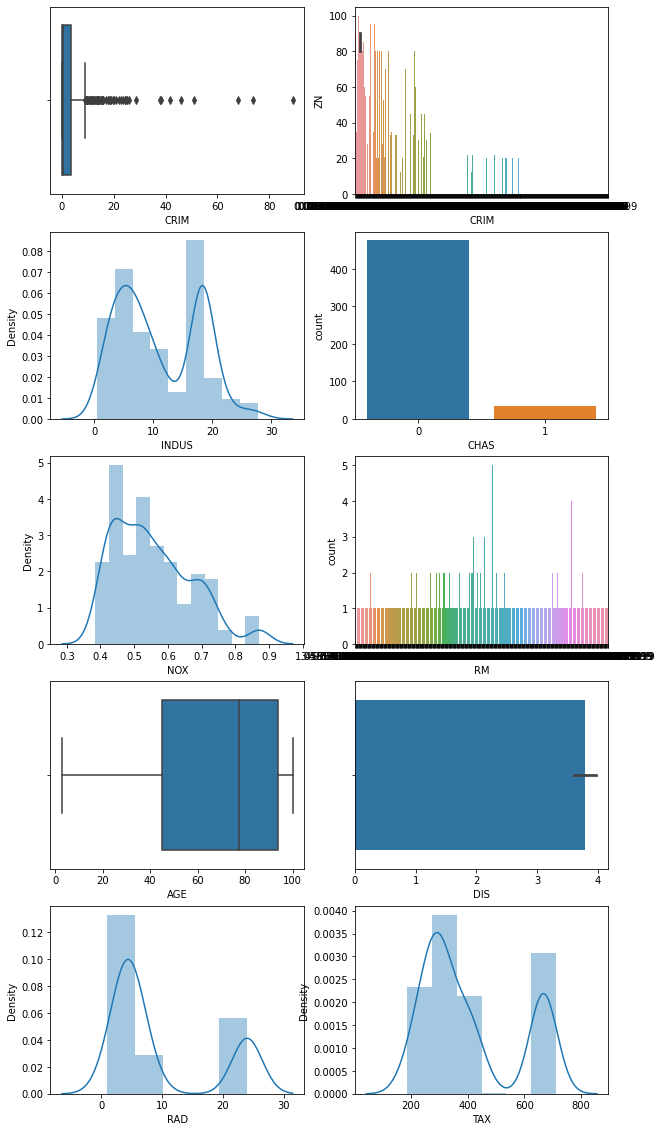

In [9]:
fig, ax = plt.subplots(5,2, figsize=(10,20))
sns.boxplot(df['CRIM'],data=df, ax=ax[0,0])
sns.barplot(y=df['ZN'],x=df['CRIM'],data=df,ax=ax[0,1])
sns.distplot(df['INDUS'],ax=ax[1,0])
sns.countplot(df['CHAS'],ax=ax[1,1])
sns.distplot(df['NOX'],ax=ax[2,0])
sns.countplot(df['RM'],ax=ax[2,1])
sns.boxplot(df['AGE'],ax=ax[3,0])
sns.barplot(df['DIS'],ax=ax[3,1])
sns.distplot(df['RAD'],ax=ax[4,0])
sns.distplot(df['TAX'],ax=ax[4,1])


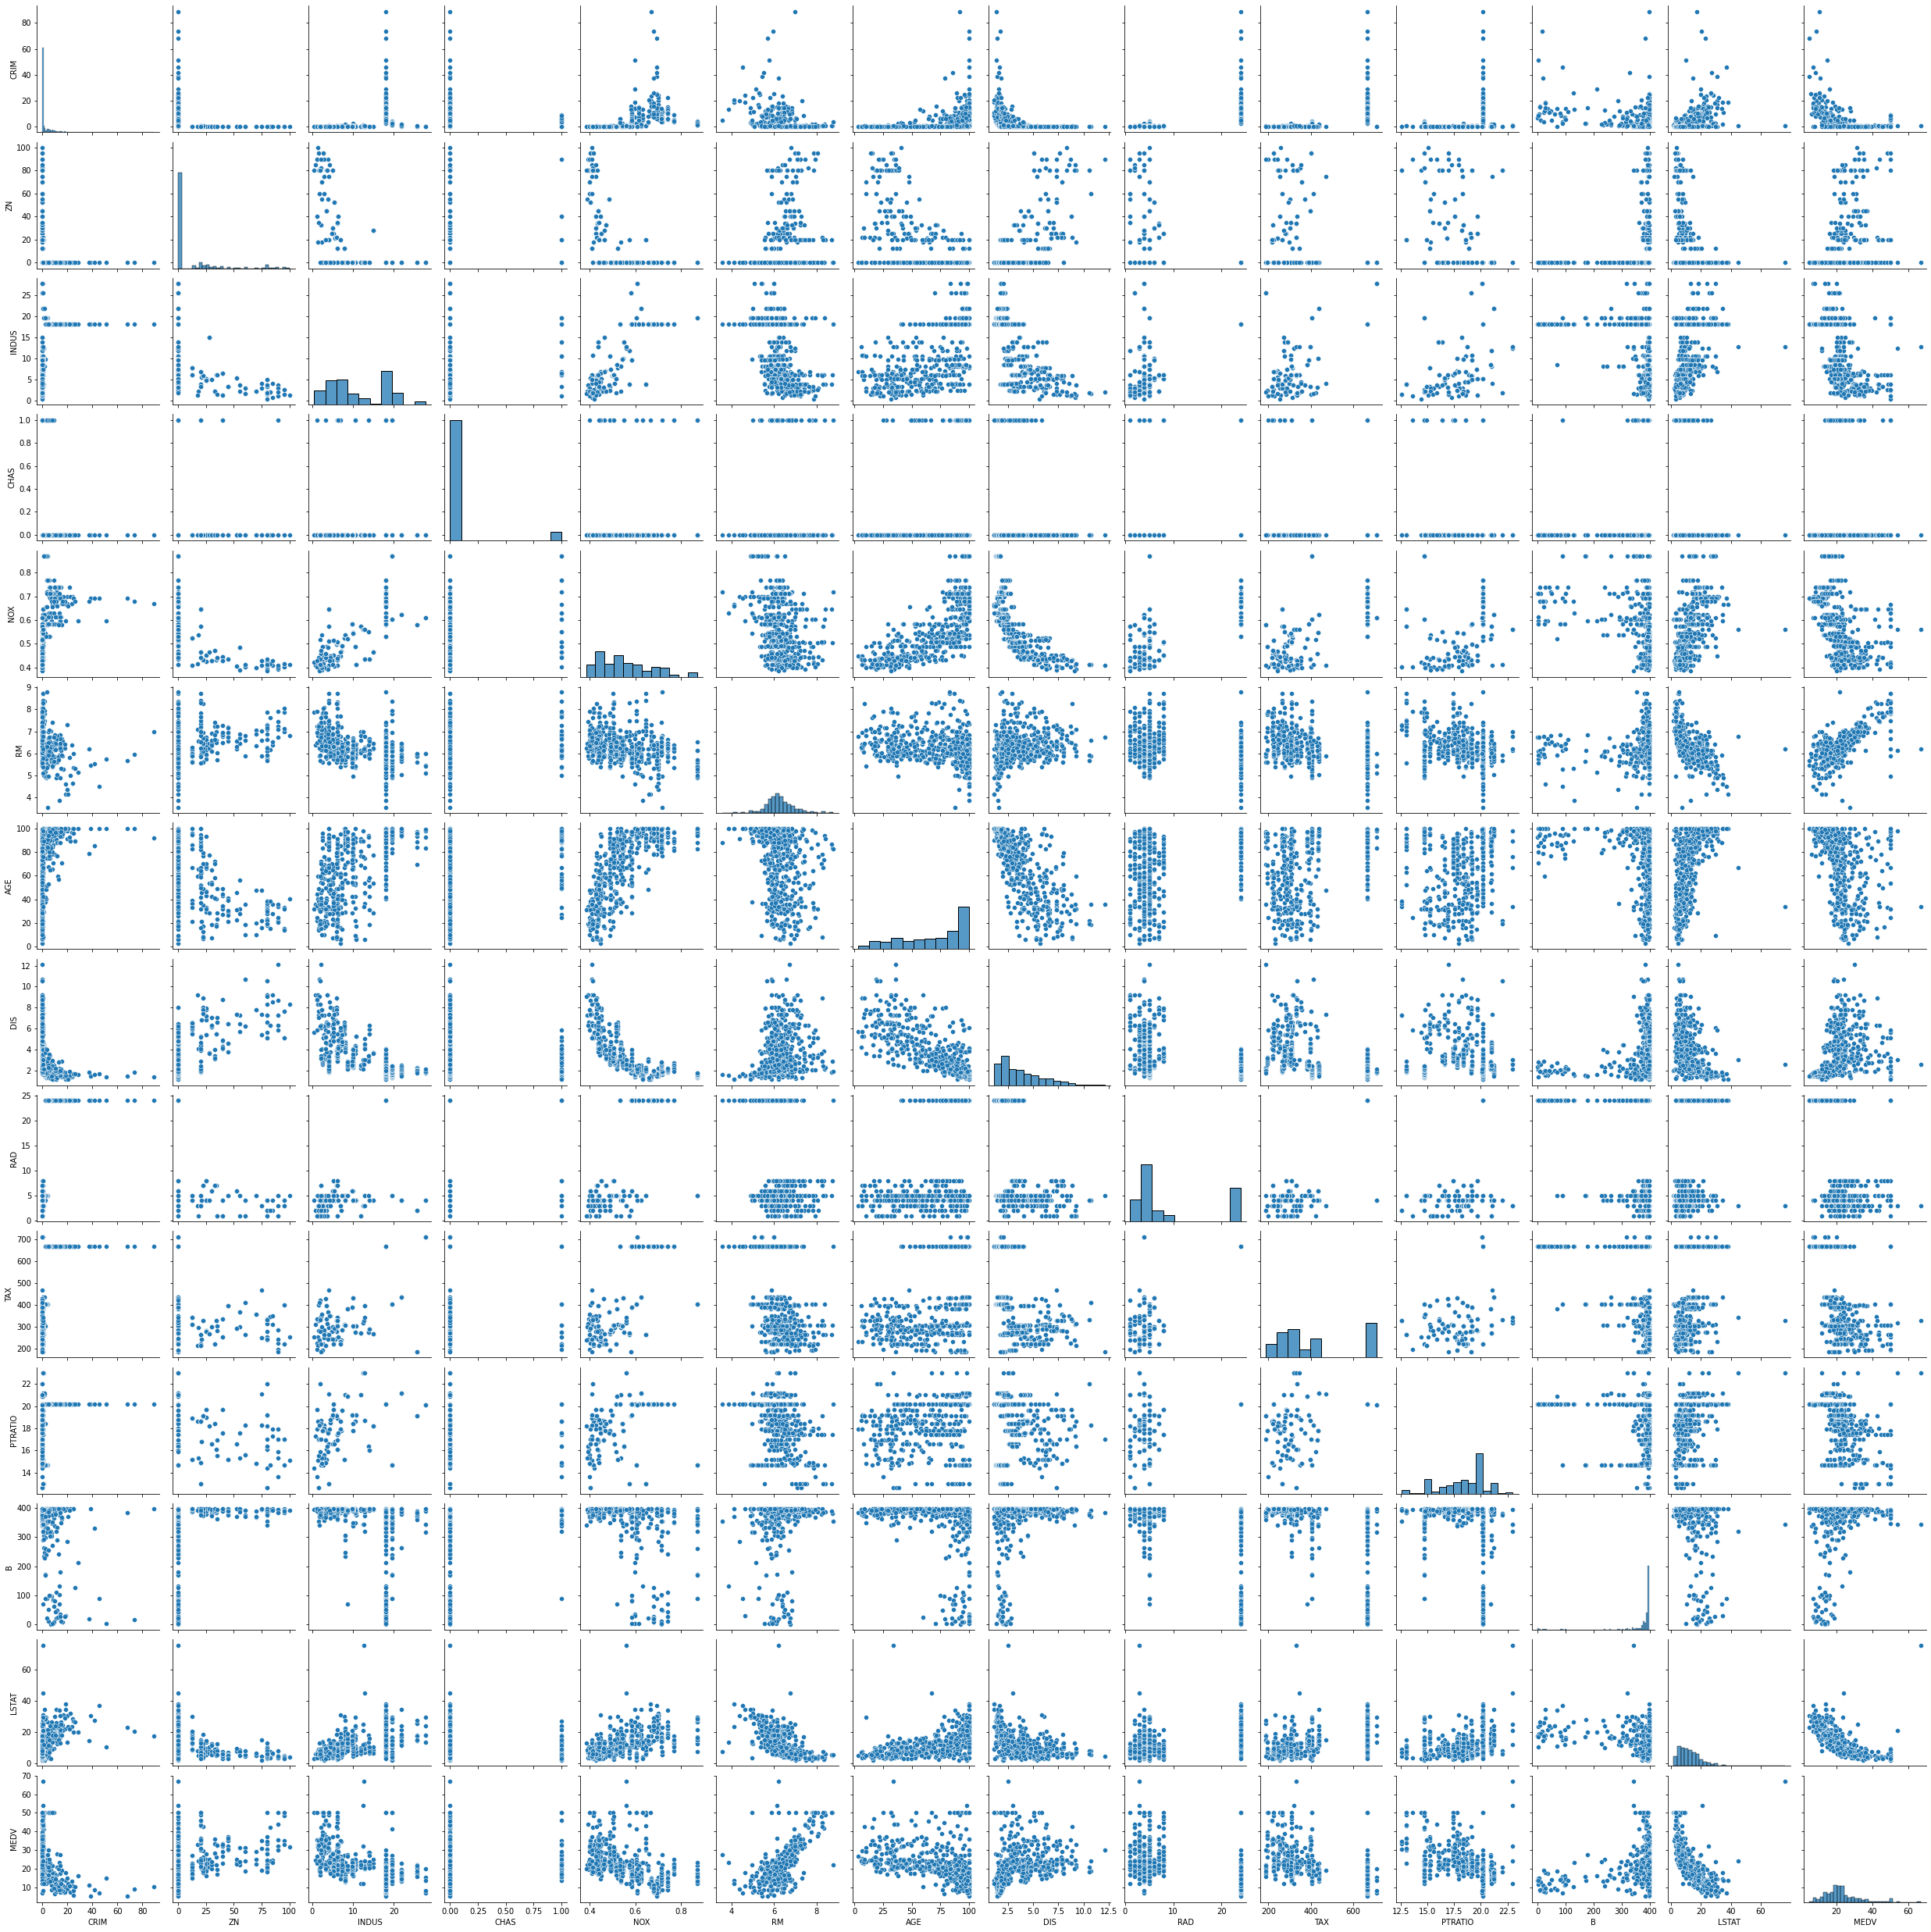

In [10]:
sns.pairplot(df)

<AxesSubplot:>

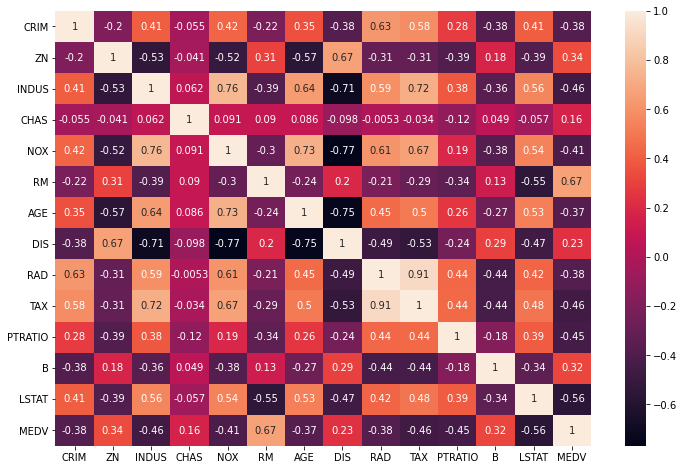

In [11]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

In [12]:
X = df.drop('CRIM',axis=1)
y = df['CRIM']

In [13]:
x1 = sm.add_constant(X)
result = sm.OLS(y,x1).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   CRIM   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                     31.71
Date:                Sun, 23 May 2021   Prob (F-statistic):           4.77e-57
Time:                        03:41:18   Log-Likelihood:                -1667.7
No. Observations:                 511   AIC:                             3363.
Df Residuals:                     497   BIC:                             3423.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.3161      6.576      2.481      0.013       3.397      29.235
ZN             0.0445      0.019      2.397      0.017       0.008       0.081
INDUS         -0.0646      0.083     -0.778      0.437      -0.228       0.098
CHAS          -0.8127      1.173     -0.693      0.489      -3.118       1.492
NOX           -9.9340      5.199     -1.911      0.057     -20.149       0.281
RM             0.3233      0.596      0.543      0.588      -0.847       1.494
AGE            0.0025      0.017      0.145      0.885      -0.031       0.036
DIS           -0.9570      0.278     -3.444      0.001      -1.503      -0.411
RAD            0.5827      0.086      6.805      0.000       0.414       0.751
TAX           -0.0036      0.005     -0.708      0.479      -0.014       0.006
PTRATIO       -0.2424      0.174     -1.395      0.164      -0.584       0.099
B             -0.0078      0.004     -2.143      0.033      -0.015      -0.001
LSTAT          0.1342      0.054      2.493      0.013       0.028       0.240
MEDV          -0.1780      0.048     -3.688      0.000      -0.273      -0.083
==============================================================================
Omnibus:                      676.906   Durbin-Watson:                   1.518
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            88783.223
Skew:                           6.682   Prob(JB):                         0.00
Kurtosis:                      66.176   Cond. No.                     1.48e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
X = df[['ZN','RAD','MEDV']]
y = df['CRIM']

In [15]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [17]:
vif = pd.DataFrame()
vif['Vif'] = X.columns
vif['VIF Factors'] = [variance_inflation_factor(X.values,i)
                     for i in range(X.shape[1])]
vif

,Vif,VIF Factors
0,ZN,1.456221
1,RAD,1.606155
2,MEDV,2.162254


In [18]:
x = sm.add_constant(X)
result = sm.OLS(y,x).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   CRIM   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     120.8
Date:                Sun, 23 May 2021   Prob (F-statistic):           5.05e-59
Time:                        03:41:19   Log-Likelihood:                -1684.2
No. Observations:                 511   AIC:                             3376.
Df Residuals:                     507   BIC:                             3393.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7109      0.980      1.745      0.082      -0.215       3.637
ZN             0.0135      0.014      0.995      0.320      -0.013       0.040
RAD            0.5622      0.037     15.232      0.000       0.490       0.635
MEDV          -0.1592      0.034     -4.654      0.000      -0.226      -0.092
==============================================================================
Omnibus:                      664.611   Durbin-Watson:                   1.384
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            78517.270
Skew:                           6.504   Prob(JB):                         0.00
Kurtosis:                      62.317   Cond. No.                         107.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [23]:
lr_predict = lr.predict(X_test)

In [24]:
lr.score(X_train,y_train)

0.4603988131706933

In [25]:
from sklearn.ensemble import RandomForestRegressor

In [26]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
rf_predict = rf.predict(X_test)
rf.score(X_train,y_train)

0.8414916573184672

In [27]:
data = df.copy()

In [28]:
X = data.drop('CRIM',axis=1)
Y = data['CRIM']

In [29]:
# X = data[['ZN', 'INDUS', 'CHAS', 'NOX','AGE', 'DIS', 'RAD', 'TAX',
#        'PTRATIO', 'B', 'LSTAT', 'MEDV']]
# y = data['CRIM']

In [30]:
# vif = pd.DataFrame()
# vif['Vif'] = X.columns
# vif['VIF Factors'] = [variance_inflation_factor(X.values,i)
#                      for i in range(X.shape[1])]
# vif

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [32]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [33]:
rf.predict(X_test)

array([1.87642300e-01, 7.41115000e-02, 2.27108000e-02, 4.25223700e-01,
       1.60069000e-01, 1.82863390e+00, 4.57512800e-01, 8.44404000e-02,
       1.20961625e+01, 7.11921000e-02, 1.48680760e-01, 4.65575300e-01,
       1.84562600e-01, 2.50306160e+00, 2.12424000e-01, 1.28436100e-01,
       5.59919000e-02, 2.20382850e+01, 8.74615000e-02, 3.82736900e-01,
       4.33054000e-02, 6.41839800e-01, 6.72174400e-01, 3.38615860e-01,
       2.70744620e+00, 6.70342080e+00, 6.23415700e-01, 2.72011636e+01,
       4.78950000e-02, 1.46508446e+01, 9.40887700e-01, 8.13949900e-01,
       1.18290620e+00, 6.49563100e-01, 1.10869500e-01, 2.50158398e+01,
       2.90901290e+00, 4.30009000e-01, 7.05274590e+00, 4.13299000e-02,
       1.21863434e+01, 8.89620710e+00, 1.11347900e-01, 1.50355000e-01,
       4.05100500e-01, 8.13593000e-02, 1.01907105e+01, 1.20736629e+01,
       4.08352000e-02, 4.92004000e-02, 5.46779000e-02, 3.53435130e-01,
       2.97010210e-01, 5.69773000e-01, 3.85146000e-02, 5.97649000e-02,
      

In [34]:
rf.score(X_train,y_train)

0.9437698962923126